In [3]:
import matplotlib.pyplot as plt
import pickle
import math

In [2]:
dataSetConfigs = [
    
    {
        'name': 'ijcnn1',

        'dataSet' : 'ijcnn1',
        'dataSetSize': 49990,
        'maxFeature': 22,
        'findingType': '1',

        'honestNodeSize': 50,
        'byzantineNodeSize': 20,

        'rounds': 10,
        'displayInterval': 4000,
    },
    {
        'name': 'covtype',

        'dataSet' : 'covtype.libsvm.binary.scale',
        'dataSetSize': 581012,
        'maxFeature': 54,
        'findingType': '1',

        'honestNodeSize': 50,
        'byzantineNodeSize': 20,

        'rounds': 10,
        'displayInterval': 4000,
    }
]


# 多聚合方式比较图

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


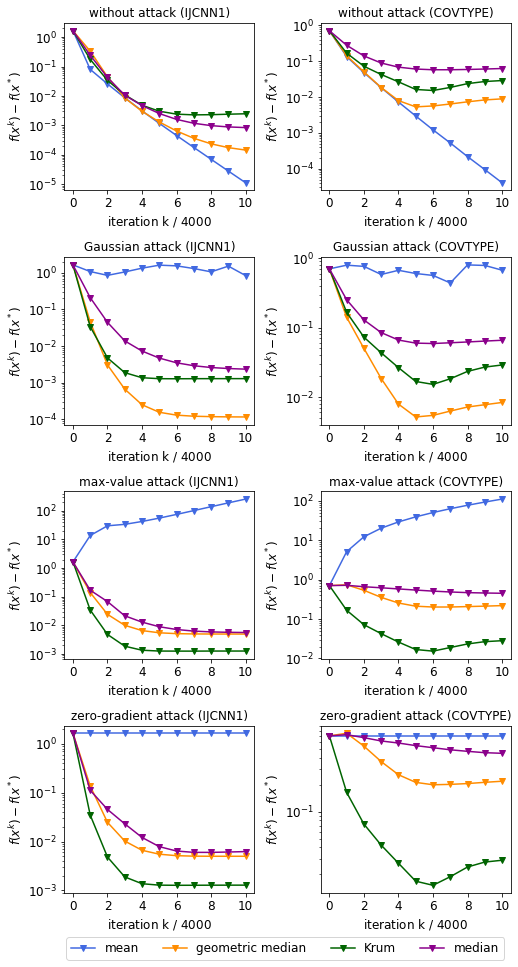

In [3]:
import matplotlib.pyplot as plt
import pickle
import math

def logAxis(path, Fmin):
    return [p-Fmin for p in path]

# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

SCALE = 2.0
FONT_SIZE = 12

fig, axs = plt.subplots(4, 2)
axs = tuple(zip(*axs))

for axColumn, dataSetConfig in zip(axs, dataSetConfigs):
    
    CACHE_DIR = './cache/' + dataSetConfig['name']
    with open(CACHE_DIR + '_Fmin', 'rb') as f:
        obj = pickle.load(f)
        Fmin, w_min = obj['Fmin'], obj['w_min']

    x_axis = list(range(dataSetConfig['rounds']+1))

    attackNames = [
        ('baseline', 'without attack'), 
        ('white', 'Gaussian attack'), 
        ('maxValue', 'max-value attack'), 
        ('zeroGradient', 'zero-gradient attack'),
    ]
    # 文件名 图片中显示的名称 颜色
    aggregations = [
        ('mean', 'mean', 'royalblue'), 
        ('gm', 'geometric median', 'darkorange'), 
        ('Krum', 'Krum', 'darkgreen'), 
        ('median', 'median', 'darkmagenta'),
    ]
    
    for ax, (attackName, title) in zip(axColumn, attackNames):
        # 画曲线
        for (aggregationName, showName, color) in aggregations:
            with open(CACHE_DIR + '_SAGA_' + attackName + '_' + aggregationName, 'rb') as f:
                record = pickle.load(f)
                path = record['path']
                path = logAxis(path, Fmin)
                ax.plot(x_axis, path, 'v-', color=color, label=showName)
    
        # 填小标题
        ax.set_title('{} ({})'.format(title, dataSetConfig['name'].upper()))
        
        # 坐标轴
        ax.set_yscale('log')
        ax.set_ylabel(r'$f(x^k)-f(x^*)$', fontsize=FONT_SIZE)
        ax.set_xlabel(r'iteration k / ${}$'.format(dataSetConfig['displayInterval']), fontsize=FONT_SIZE)
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontsize(FONT_SIZE) for label in labels]
#         ax.set_ylim(top=1e2, bottom=1e-6)

# 图例
axs[0][-1].legend(loc='lower left', bbox_to_anchor=(0.01,-0.4), 
                  borderaxespad = 0., ncol=4, fontsize=FONT_SIZE)
# for ax in axs[1]:
#     ax.set_ylim(top=1e10)

fig.set_size_inches((SCALE*4, SCALE*8))
plt.subplots_adjust(hspace=0.4, wspace=0.35)
plt.savefig('./attack_ijc_cov.eps', format='eps', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


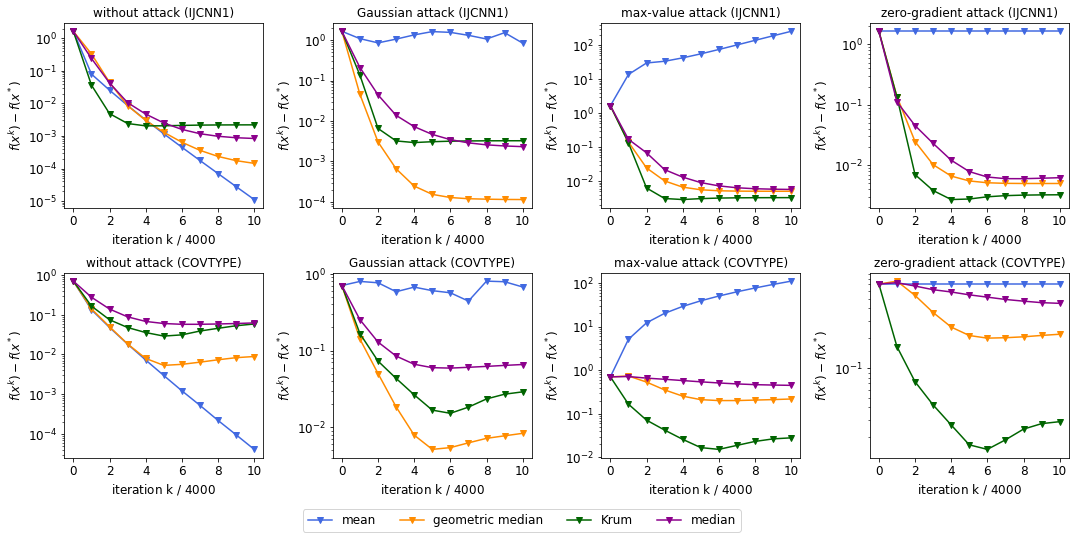

In [4]:
import matplotlib.pyplot as plt
import pickle
import math

def logAxis(path, Fmin):
    return [p-Fmin for p in path]

# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

SCALE = 2.0
FONT_SIZE = 12

fig, axs = plt.subplots(2, 4)
# axs = tuple(zip(*axs))

for axColumn, dataSetConfig in zip(axs, dataSetConfigs):
    
    CACHE_DIR = './cache/' + dataSetConfig['name']
    with open(CACHE_DIR + '_Fmin', 'rb') as f:
        obj = pickle.load(f)
        Fmin, w_min = obj['Fmin'], obj['w_min']

    x_axis = list(range(dataSetConfig['rounds']+1))

    attackNames = [
        ('baseline', 'without attack'), 
        ('white', 'Gaussian attack'), 
        ('maxValue', 'max-value attack'), 
        ('zeroGradient', 'zero-gradient attack'),
    ]
    # 文件名 图片中显示的名称 颜色
    aggregations = [
        ('mean', 'mean', 'royalblue'), 
        ('gm', 'geometric median', 'darkorange'), 
        ('Krum', 'Krum', 'darkgreen'), 
        ('median', 'median', 'darkmagenta'),
    ]
    
    for ax, (attackName, title) in zip(axColumn, attackNames):
        # 画曲线
        for (aggregationName, showName, color) in aggregations:
            with open(CACHE_DIR + '_SAGA_' + attackName + '_' + aggregationName, 'rb') as f:
                record = pickle.load(f)
                path = record['path']
                path = logAxis(path, Fmin)
                ax.plot(x_axis, path, 'v-', color=color, label=showName)
    
        # 填小标题
        ax.set_title('{} ({})'.format(title, dataSetConfig['name'].upper()))
        
        # 坐标轴
        ax.set_yscale('log')
        ax.set_ylabel(r'$f(x^k)-f(x^*)$', fontsize=FONT_SIZE)
        ax.set_xlabel(r'iteration k / ${}$'.format(dataSetConfig['displayInterval']), fontsize=FONT_SIZE)
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontsize(FONT_SIZE) for label in labels]
#         ax.set_ylim(top=1e2, bottom=1e-6)

# 图例
# 两行
axs[1][0].legend(loc='lower left', bbox_to_anchor=(1.2,-0.4), 
                  borderaxespad = 0., ncol=4, fontsize=FONT_SIZE)

fig.set_size_inches((SCALE*9, SCALE*4))
plt.subplots_adjust(hspace=0.35, wspace=0.35)
# plt.savefig('./attack_ijc_cov.eps', format='eps', bbox_inches='tight')
plt.show()

# 多聚合方式比较图（SGD-SAGA）

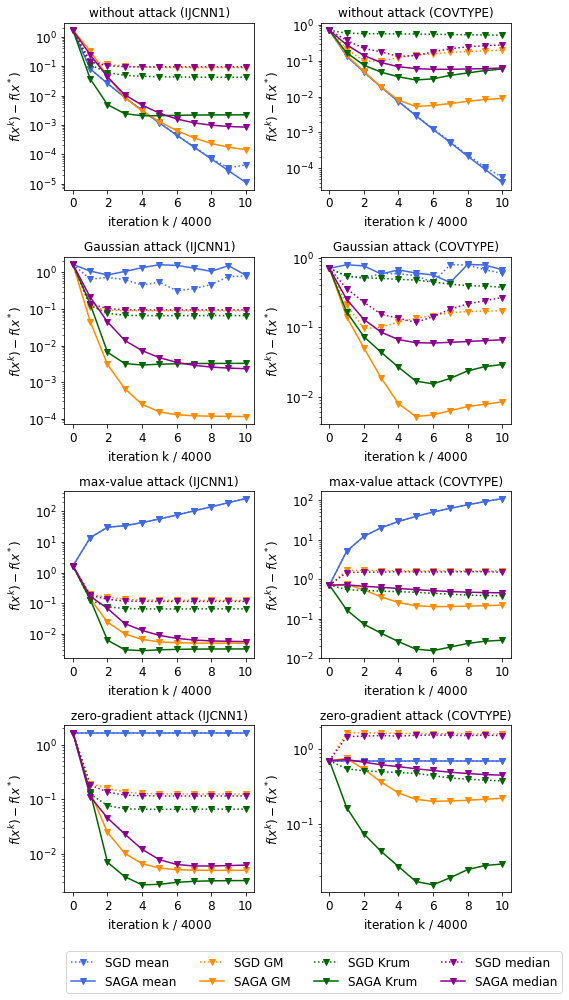

In [4]:
import matplotlib.pyplot as plt
import pickle
import math

def logAxis(path, Fmin):
    return [p-Fmin for p in path]

# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

SCALE = 2.0
FONT_SIZE = 12

fig, axs = plt.subplots(4, 2)
axs = tuple(zip(*axs))

for axColumn, dataSetConfig in zip(axs, dataSetConfigs):
    
    CACHE_DIR = './cache/' + dataSetConfig['name']
    with open(CACHE_DIR + '_Fmin', 'rb') as f:
        obj = pickle.load(f)
        Fmin, w_min = obj['Fmin'], obj['w_min']

    x_axis = list(range(dataSetConfig['rounds']+1))

    attackNames = [
        ('baseline', 'without attack'), 
        ('white', 'Gaussian attack'), 
        ('maxValue', 'max-value attack'), 
        ('zeroGradient', 'zero-gradient attack'),
    ]
    # 文件名 图片中显示的名称 颜色
    aggregations = [
        ('mean', 'mean', 'royalblue'), 
        ('gm', 'GM', 'darkorange'), 
        ('Krum', 'Krum', 'darkgreen'), 
        ('median', 'median', 'darkmagenta'),
    ]
    
    algorithms = [
        ('SGD', ':'),
        ('SAGA', '-'),
    ]
    
    for ax, (attackName, title) in zip(axColumn, attackNames):
        # 画曲线
        for (aggregationName, showName, color) in aggregations:
            for algorithm, line in algorithms:
                try:
                    with open(CACHE_DIR + '_' + algorithm + '_' + attackName + '_' + aggregationName, 'rb') as f:
                        record = pickle.load(f)
                        path = record['path']
                        path = logAxis(path, Fmin)
                        ax.plot(x_axis, path, 'v'+line, color=color, label=algorithm + ' ' + showName)
                except Exception as e:
                    print(e)
    
        # 填小标题
        ax.set_title('{} ({})'.format(title, dataSetConfig['name'].upper()))
        
        # 坐标轴
        ax.set_yscale('log')
        ax.set_ylabel(r'$f(x^k)-f(x^*)$', fontsize=FONT_SIZE)
        ax.set_xlabel(r'iteration k / ${}$'.format(dataSetConfig['displayInterval']), fontsize=FONT_SIZE)
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontsize(FONT_SIZE) for label in labels]
#         ax.set_ylim(top=1e2, bottom=1e-6)

# 图例
axs[0][-1].legend(loc='lower left', bbox_to_anchor=(0.01,-0.6), 
                  borderaxespad = 0., ncol=4, fontsize=FONT_SIZE)
# for ax in axs[1]:
#     ax.set_ylim(top=1e10)

fig.set_size_inches((SCALE*4, SCALE*8))
plt.subplots_adjust(hspace=0.4, wspace=0.35)
# plt.savefig('./attack_ijc_cov.jpg', format='jpg', bbox_inches='tight')
# plt.savefig('./attack_ijc_cov.eps', format='eps', bbox_inches='tight')
plt.show()

# 神经网络对比

In [5]:
for optimizer in ['SAGA', 'SGD', 'BatchSGD']:
    for attack in ['baseline', 'white', 'maxValue', 'zeroGradient']:
        for aggegate in ['mean', 'gm']:
            file = optimizer + '_' + attack + '_' + aggegate
            try:
                with open('./cache/mnist_' + file, 'rb') as f:
                    record = pickle.load(f)
                    print('{:>4} {:>4f} {}'.format(record['gamma'], record['accPath'][-1]*100, file))
            except:
                print(file)

 0.1 96.519600 SAGA_baseline_mean
 0.1 96.395200 SAGA_baseline_gm
 0.1 14.514400 SAGA_white_mean
 0.1 96.450800 SAGA_white_gm
 0.1 0.129200 SAGA_maxValue_mean
 0.1 86.406800 SAGA_maxValue_gm
 0.1 9.886400 SAGA_zeroGradient_mean
 0.1 92.495600 SAGA_zeroGradient_gm
 0.1 96.556000 SGD_baseline_mean
 0.1 91.830800 SGD_baseline_gm
 0.1 14.128000 SGD_white_mean
 0.1 91.910000 SGD_white_gm
 0.1 0.150000 SGD_maxValue_mean
 0.1 0.028400 SGD_maxValue_gm
 0.1 9.785600 SGD_zeroGradient_mean
 0.1 26.346400 SGD_zeroGradient_gm
 0.5 98.626040 BatchSGD_baseline_mean
 0.5 98.058440 BatchSGD_baseline_gm
 0.5 36.360280 BatchSGD_white_mean
 0.5 98.062000 BatchSGD_white_gm
 0.5 0.164080 BatchSGD_maxValue_mean
 0.5 90.305000 BatchSGD_maxValue_gm
 0.5 9.895120 BatchSGD_zeroGradient_mean
 0.5 81.514760 BatchSGD_zeroGradient_gm


# 步长比较

ijcnn1 步长比较

In [6]:
for optimizer in ['SAGA', 'SVRG', 'SGD', 'BatchSGD']:
    for attack in ['baseline', 'white', 'maxValue', 'zeroGradient']:
        for aggegate in ['mean', 'gm']:
            file = optimizer + '_' + attack + '_' + aggegate
            try:
                with open('./cache/ijcnn1_' + file, 'rb') as f:
                    record = pickle.load(f)
                    print(record['gamma'], file)
            except Exception as e:
                print(e)

0.02 SAGA_baseline_mean
0.02 SAGA_baseline_gm
0.02 SAGA_white_mean
0.02 SAGA_white_gm
0.02 SAGA_maxValue_mean
0.02 SAGA_maxValue_gm
0.02 SAGA_zeroGradient_mean
0.02 SAGA_zeroGradient_gm
0.02 SVRG_baseline_mean
0.02 SVRG_baseline_gm
0.02 SVRG_white_mean
0.02 SVRG_white_gm
0.02 SVRG_maxValue_mean
0.02 SVRG_maxValue_gm
0.02 SVRG_zeroGradient_mean
0.02 SVRG_zeroGradient_gm
0.02 SGD_baseline_mean
0.02 SGD_baseline_gm
0.02 SGD_white_mean
0.02 SGD_white_gm
0.02 SGD_maxValue_mean
0.02 SGD_maxValue_gm
0.02 SGD_zeroGradient_mean
0.02 SGD_zeroGradient_gm
0.02 BatchSGD_baseline_mean
0.01 BatchSGD_baseline_gm
0.01 BatchSGD_white_mean
0.01 BatchSGD_white_gm
0.01 BatchSGD_maxValue_mean
0.01 BatchSGD_maxValue_gm
0.01 BatchSGD_zeroGradient_mean
0.01 BatchSGD_zeroGradient_gm


covtype

In [7]:
for optimizer in ['SAGA', 'SVRG', 'SARAH', 'SGD', 'BatchSGD']:
    for attack in ['baseline', 'white', 'maxValue', 'zeroGradient']:
        for aggegate in ['mean', 'gm', 'median', 'Krum']:
            file = optimizer + '_' + attack + '_' + aggegate
            try:
                with open('./cache/covtype_' + file, 'rb') as f:
                    record = pickle.load(f)
                    print(record['gamma'], file)
            except Exception as e:
                print(e)

0.01 SAGA_baseline_mean
0.01 SAGA_baseline_gm
0.01 SAGA_baseline_median
0.01 SAGA_baseline_Krum
0.01 SAGA_white_mean
0.01 SAGA_white_gm
0.01 SAGA_white_median
0.01 SAGA_white_Krum
0.01 SAGA_maxValue_mean
0.01 SAGA_maxValue_gm
0.01 SAGA_maxValue_median
0.01 SAGA_maxValue_Krum
0.01 SAGA_zeroGradient_mean
0.01 SAGA_zeroGradient_gm
0.01 SAGA_zeroGradient_median
0.01 SAGA_zeroGradient_Krum
0.01 SVRG_baseline_mean
0.01 SVRG_baseline_gm
0.01 SVRG_baseline_median
0.01 SVRG_baseline_Krum
0.01 SVRG_white_mean
0.01 SVRG_white_gm
0.01 SVRG_white_median
0.01 SVRG_white_Krum
0.01 SVRG_maxValue_mean
0.01 SVRG_maxValue_gm
0.01 SVRG_maxValue_median
0.01 SVRG_maxValue_Krum
0.01 SVRG_zeroGradient_mean
0.01 SVRG_zeroGradient_gm
0.01 SVRG_zeroGradient_median
0.01 SVRG_zeroGradient_Krum
0.01 SARAH_baseline_mean
0.01 SARAH_baseline_gm
0.01 SARAH_baseline_median
0.01 SARAH_baseline_Krum
0.01 SARAH_white_mean
0.01 SARAH_white_gm
0.01 SARAH_white_median
0.01 SARAH_white_Krum
0.01 SARAH_maxValue_mean
0.01 SARAH_

mnist 步长比较

In [64]:
with open('./cache/mnist_SAGA_baseline_mean', 'rb') as f:
    record = pickle.load(f)
print('[SAGA] gamma={}'.format(record['gamma']))
with open('./cache/mnist_SGD_baseline_mean', 'rb') as f:
    record = pickle.load(f)
print('[SGD] gamma={}'.format(record['gamma']))

[SAGA] gamma=0.1
[SGD] gamma=0.01


# 方差比较图（竖）

ijcnn

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


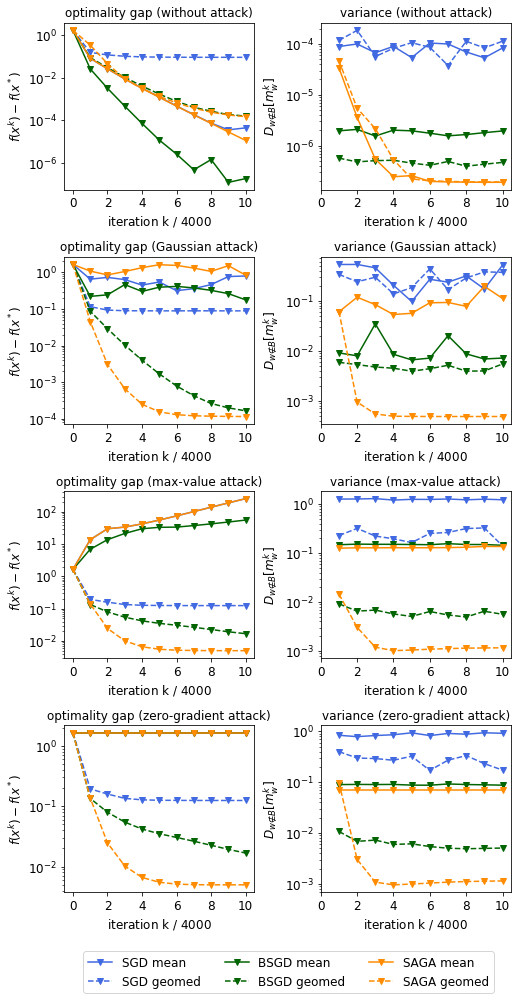

In [30]:
import matplotlib.pyplot as plt
import pickle
import math

def logAxis(path, Fmin):
    return [p-Fmin for p in path]

# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

dataSetConfig = {
    'name': 'ijcnn1',

    'dataSet' : 'ijcnn1',
    'dataSetSize': 49990,
    'maxFeature': 22,
    'findingType': '1',

    'honestNodeSize': 50,
    'byzantineNodeSize': 20,

    'rounds': 10,
    'displayInterval': 4000,
}

SCALE = 2.0
FONT_SIZE = 12

fig, axs = plt.subplots(4, 2)

attackNames = [
    ('baseline', 'without attack'), 
    ('white', 'Gaussian attack'), 
    ('maxValue', 'max-value attack'), 
    ('zeroGradient', 'zero-gradient attack'),
]
# 名称 颜色
optimizers = [
    ('SGD', 'SGD', 'royalblue'), 
    ('BatchSGD', 'BSGD', 'darkgreen'), 
    ('SAGA', 'SAGA', 'darkorange'),
]
# 文件名 图片中显示的名称 纹理
aggregations = [
    ('mean', 'mean',  'v-'), 
    ('gm', 'geomed','v--'),
]

CACHE_DIR = './cache/' + dataSetConfig['name']
with open(CACHE_DIR + '_Fmin', 'rb') as f:
    obj = pickle.load(f)
    Fmin, w_min = obj['Fmin'], obj['w_min']

x_axis = list(range(dataSetConfig['rounds']+1))
x_axis_minus_1 = list(range(1, dataSetConfig['rounds']+1))

for axline, (attackName, title) in zip(axs, attackNames):
    for optimizer, optimizerName, color in optimizers:
        for (aggregationName, showName, fmt) in aggregations:
            # 标签
            label = optimizerName + ' ' + showName
            
            # 画曲线
            with open(CACHE_DIR + '_' + optimizer+'_' + attackName + '_' + aggregationName, 'rb') as f:
                record = pickle.load(f)
                # 损失函数
                path = record['path']
                path = logAxis(path, Fmin)
                axline[0].plot(x_axis, path, fmt, color=color, label=label)
                # variance
                variancePath = record['variancePath']
                axline[1].plot(x_axis_minus_1, variancePath, fmt, color=color, label=label)
        
        # 填小标题
        axline[0].set_title('optimality gap ({})'.format(title))
        axline[1].set_title('variance ({})'.format(title))
    for ax in axline:
        # 坐标轴
        ax.set_yscale('log')
        ax.set_xlabel(r'iteration k / ${}$'.format(dataSetConfig['displayInterval']), fontsize=FONT_SIZE)
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontsize(FONT_SIZE) for label in labels]

    axline[0].set_ylabel(r'$f(x^k)-f(x^*)$', fontsize=FONT_SIZE)
    axline[1].set_ylabel(r'$D_{w\notin B} [m_w^k]$', fontsize=FONT_SIZE)
    axline[1].set_xlim(left=0)
    
# 图例
# 一行
# axs[-1][0].legend(loc='lower left', bbox_to_anchor=(0.01,-0.4), 
#                   borderaxespad = 0., ncol=4, fontsize=FONT_SIZE)
# 两行
axs[-1][0].legend(loc='lower left', bbox_to_anchor=(0.1,-0.6), 
                  borderaxespad = 0., ncol=3, fontsize=FONT_SIZE)

fig.set_size_inches((SCALE*4, SCALE*8))
plt.subplots_adjust(hspace=0.4, wspace=0.35)
plt.savefig('./attack_loss_variance.eps', format='eps', bbox_inches='tight')
# plt.savefig('./attack_loss_variance.jpg', format='jpg', bbox_inches='tight')
plt.show()

covtype

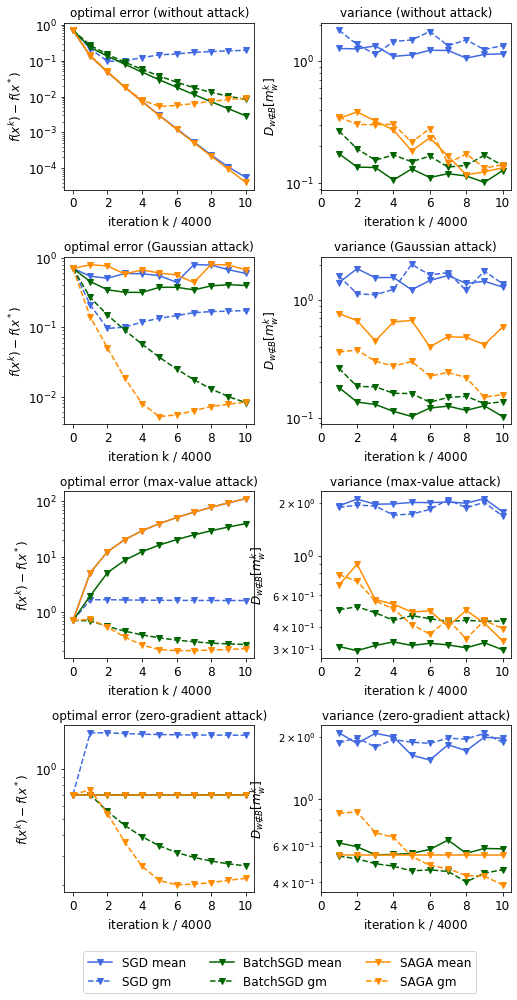

In [8]:
import matplotlib.pyplot as plt
import pickle
import math

def logAxis(path, Fmin):
    return [p-Fmin for p in path]

# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

dataSetConfig = dataSetConfigs[1]

SCALE = 2.0
FONT_SIZE = 12

fig, axs = plt.subplots(4, 2)

attackNames = [
    ('baseline', 'without attack'), 
    ('white', 'Gaussian attack'), 
    ('maxValue', 'max-value attack'), 
    ('zeroGradient', 'zero-gradient attack'),
]
# 名称 颜色
optimizers = [
    ('SGD','royalblue'), 
    ('BatchSGD', 'darkgreen'), 
    ('SAGA', 'darkorange'),
]
# 文件名 图片中显示的名称 纹理
aggregations = [
    ('mean', 'mean',  'v-'), 
    ('gm', 'gm','v--'),
]

CACHE_DIR = './cache/' + dataSetConfig['name']
with open(CACHE_DIR + '_Fmin', 'rb') as f:
    obj = pickle.load(f)
    Fmin, w_min = obj['Fmin'], obj['w_min']

x_axis = list(range(dataSetConfig['rounds']+1))
x_axis_minus_1 = list(range(1, dataSetConfig['rounds']+1))

for axline, (attackName, title) in zip(axs, attackNames):
    for optimizer, color in optimizers:
        for (aggregationName, showName, fmt) in aggregations:
            # 标签
            label = optimizer + ' ' + showName
            
            # 画曲线
            try:
                with open(CACHE_DIR + '_' + optimizer+'_' + attackName + '_' + aggregationName, 'rb') as f:
                    record = pickle.load(f)
                    # 损失函数
                    path = record['path']
                    path = logAxis(path, Fmin)
                    axline[0].plot(x_axis, path, fmt, color=color, label=label)
                    # variance
                    variancePath = record['variancePath']
                    axline[1].plot(x_axis_minus_1, variancePath, fmt, color=color, label=label)
            except Exception as e:
                print(e)
        
        # 填小标题
        axline[0].set_title('optimal error ({})'.format(title))
        axline[1].set_title('variance ({})'.format(title))
    for ax in axline:
        # 坐标轴
        ax.set_yscale('log')
        ax.set_xlabel(r'iteration k / ${}$'.format(dataSetConfig['displayInterval']), fontsize=FONT_SIZE)
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontsize(FONT_SIZE) for label in labels]

    axline[0].set_ylabel(r'$f(x^k)-f(x^*)$', fontsize=FONT_SIZE)
    axline[1].set_ylabel(r'$D_{w\notin B} [m_w^k]$', fontsize=FONT_SIZE)
    axline[1].set_xlim(left=0)
    
# 图例
# 一行
# axs[-1][0].legend(loc='lower left', bbox_to_anchor=(0.01,-0.4), 
#                   borderaxespad = 0., ncol=4, fontsize=FONT_SIZE)
# 两行
axs[-1][0].legend(loc='lower left', bbox_to_anchor=(0.1,-0.6), 
                  borderaxespad = 0., ncol=3, fontsize=FONT_SIZE)

fig.set_size_inches((SCALE*4, SCALE*8))
plt.subplots_adjust(hspace=0.4, wspace=0.35)
# plt.savefig('./attack_loss_variance.eps', format='eps', bbox_inches='tight')
# plt.savefig('./attack_loss_variance.jpg', format='jpg', bbox_inches='tight')
plt.show()

# 方差比较图（横）

ijcnn

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


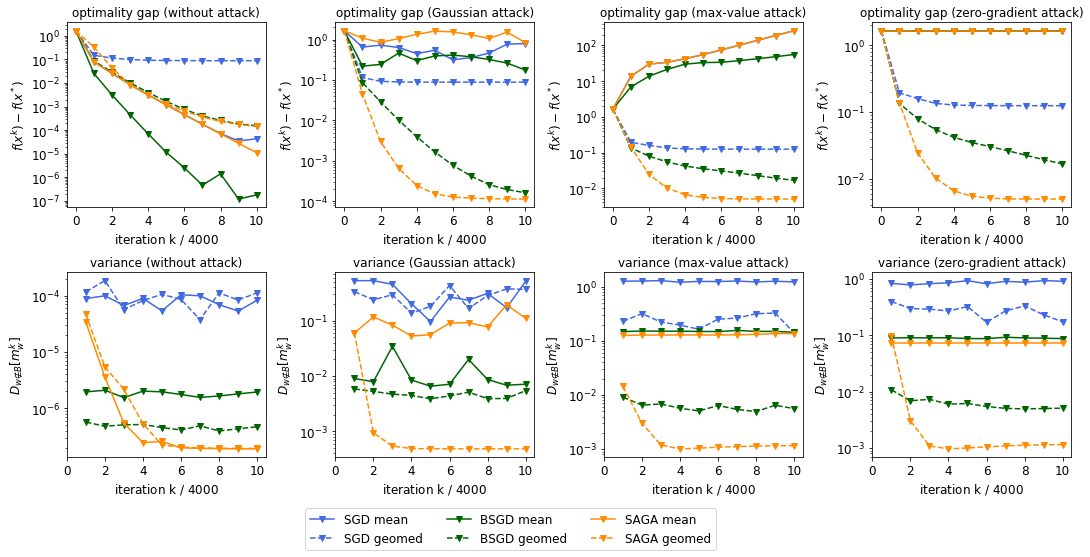

In [18]:
import matplotlib.pyplot as plt
import pickle
import math

def logAxis(path, Fmin):
    return [p-Fmin for p in path]

# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

dataSetConfig = dataSetConfigs[0]

SCALE = 2.0
FONT_SIZE = 12

fig, axs = plt.subplots(2, 4)
axs = tuple(zip(*axs))

attackNames = [
    ('baseline', 'without attack'), 
    ('white', 'Gaussian attack'), 
    ('maxValue', 'max-value attack'), 
    ('zeroGradient', 'zero-gradient attack'),
]
# 名称 颜色
optimizers = [
    ('SGD', 'SGD', 'royalblue'), 
    ('BatchSGD', 'BSGD', 'darkgreen'), 
    ('SAGA', 'SAGA', 'darkorange'),
]
# 文件名 图片中显示的名称 纹理
aggregations = [
    ('mean', 'mean',  'v-'), 
    ('gm', 'geomed','v--'),
]

CACHE_DIR = './cache/' + dataSetConfig['name']
with open(CACHE_DIR + '_Fmin', 'rb') as f:
    obj = pickle.load(f)
    Fmin, w_min = obj['Fmin'], obj['w_min']

x_axis = list(range(dataSetConfig['rounds']+1))
x_axis_minus_1 = list(range(1, dataSetConfig['rounds']+1))

for axline, (attackName, title) in zip(axs, attackNames):
    for optimizer, optimizerName, color in optimizers:
        for (aggregationName, showName, fmt) in aggregations:
            # 标签
            label = optimizerName + ' ' + showName
            
            # 画曲线
            with open(CACHE_DIR + '_' + optimizer+'_' + attackName + '_' + aggregationName, 'rb') as f:
                record = pickle.load(f)
                # 损失函数
                path = record['path']
                path = logAxis(path, Fmin)
                axline[0].plot(x_axis, path, fmt, color=color, label=label)
                # variance
                variancePath = record['variancePath']
                axline[1].plot(x_axis_minus_1, variancePath, fmt, color=color, label=label)
        
        # 填小标题
        axline[0].set_title('optimality gap ({})'.format(title))
        axline[1].set_title('variance ({})'.format(title))
    for ax in axline:
        # 坐标轴
        ax.set_yscale('log')
        ax.set_xlabel(r'iteration k / ${}$'.format(dataSetConfig['displayInterval']), fontsize=FONT_SIZE)
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontsize(FONT_SIZE) for label in labels]

    axline[0].set_ylabel(r'$f(x^k)-f(x^*)$', fontsize=FONT_SIZE)
    axline[1].set_ylabel(r'$D_{w\notin B} [m_w^k]$', fontsize=FONT_SIZE)
    axline[1].set_xlim(left=0)

# 图例
# 一行
# axs[-1][0].legend(loc='lower left', bbox_to_anchor=(0.01,-0.4), 
#                   borderaxespad = 0., ncol=4, fontsize=FONT_SIZE)
# 两行
axs[0][1].legend(loc='lower left', bbox_to_anchor=(1.2,-0.5), 
                  borderaxespad = 0., ncol=3, fontsize=FONT_SIZE)
# 右侧
# axs[-1][0].legend(loc='lower left', bbox_to_anchor=(1.2, 0.3), 
#                   borderaxespad = 0., ncol=1, fontsize=FONT_SIZE)

fig.set_size_inches((SCALE*9, SCALE*4))
plt.subplots_adjust(hspace=0.35, wspace=0.35)
# plt.savefig('./attack_loss_variance.eps', format='eps', bbox_inches='tight')
# plt.savefig('./attack_loss_variance.jpg', format='jpg', bbox_inches='tight')
plt.show()

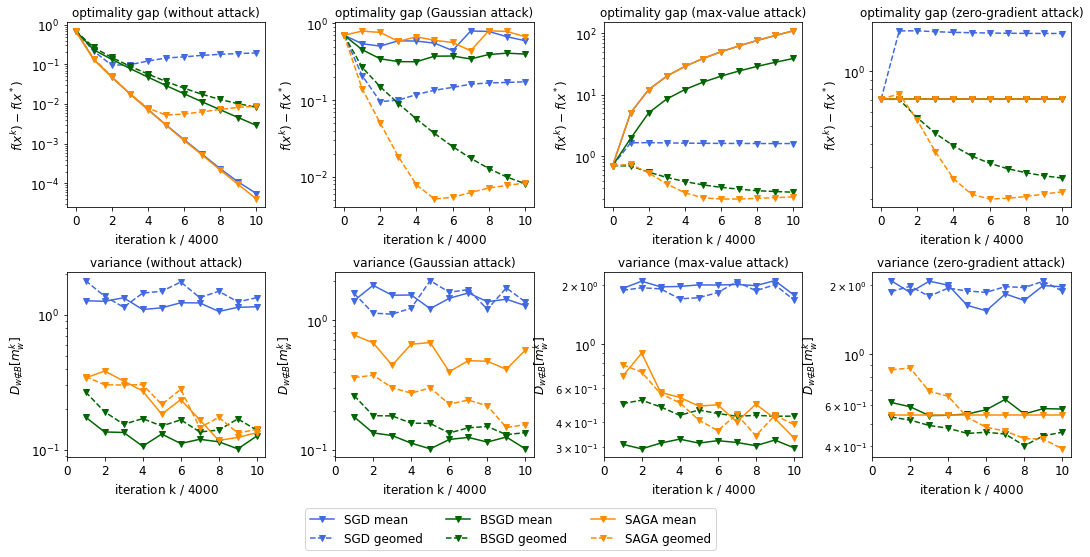

In [29]:
import matplotlib.pyplot as plt
import pickle
import math

def logAxis(path, Fmin):
    return [p-Fmin for p in path]

# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

dataSetConfig = dataSetConfigs[1]

SCALE = 2.0
FONT_SIZE = 12

fig, axs = plt.subplots(2, 4)
axs = tuple(zip(*axs))

attackNames = [
    ('baseline', 'without attack'), 
    ('white', 'Gaussian attack'), 
    ('maxValue', 'max-value attack'), 
    ('zeroGradient', 'zero-gradient attack'),
]
# 名称 颜色
optimizers = [
    ('SGD', 'SGD', 'royalblue'), 
    ('BatchSGD', 'BSGD', 'darkgreen'), 
    ('SAGA', 'SAGA', 'darkorange'),
]
# 文件名 图片中显示的名称 纹理
aggregations = [
    ('mean', 'mean',  'v-'), 
    ('gm', 'geomed','v--'),
]

CACHE_DIR = './cache/' + dataSetConfig['name']
with open(CACHE_DIR + '_Fmin', 'rb') as f:
    obj = pickle.load(f)
    Fmin, w_min = obj['Fmin'], obj['w_min']

x_axis = list(range(dataSetConfig['rounds']+1))
x_axis_minus_1 = list(range(1, dataSetConfig['rounds']+1))

for axline, (attackName, title) in zip(axs, attackNames):
    for optimizer, optimizerName, color in optimizers:
        for (aggregationName, showName, fmt) in aggregations:
            # 标签
            label = optimizerName + ' ' + showName
            
            # 画曲线
            with open(CACHE_DIR + '_' + optimizer+'_' + attackName + '_' + aggregationName, 'rb') as f:
                record = pickle.load(f)
                # 损失函数
                path = record['path']
                path = logAxis(path, Fmin)
                axline[0].plot(x_axis, path, fmt, color=color, label=label)
                # variance
                variancePath = record['variancePath']
                axline[1].plot(x_axis_minus_1, variancePath, fmt, color=color, label=label)
        
        # 填小标题
        axline[0].set_title('optimality gap ({})'.format(title))
        axline[1].set_title('variance ({})'.format(title))
    for ax in axline:
        # 坐标轴
        ax.set_yscale('log')
        ax.set_xlabel(r'iteration k / ${}$'.format(dataSetConfig['displayInterval']), fontsize=FONT_SIZE)
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontsize(FONT_SIZE) for label in labels]

    axline[0].set_ylabel(r'$f(x^k)-f(x^*)$', fontsize=FONT_SIZE)
    axline[1].set_ylabel(r'$D_{w\notin B} [m_w^k]$', fontsize=FONT_SIZE)
    axline[1].set_xlim(left=0)

# 图例
# 一行
# axs[-1][0].legend(loc='lower left', bbox_to_anchor=(0.01,-0.4), 
#                   borderaxespad = 0., ncol=4, fontsize=FONT_SIZE)
# 两行
axs[0][1].legend(loc='lower left', bbox_to_anchor=(1.2,-0.5), 
                  borderaxespad = 0., ncol=3, fontsize=FONT_SIZE)
# 右侧
# axs[-1][0].legend(loc='lower left', bbox_to_anchor=(1.2, 0.3), 
#                   borderaxespad = 0., ncol=1, fontsize=FONT_SIZE)

fig.set_size_inches((SCALE*9, SCALE*4))
plt.subplots_adjust(hspace=0.35, wspace=0.35)
# plt.savefig('./attack_loss_variance.eps', format='eps', bbox_inches='tight')
# plt.savefig('./attack_loss_variance.jpg', format='jpg', bbox_inches='tight')
plt.show()

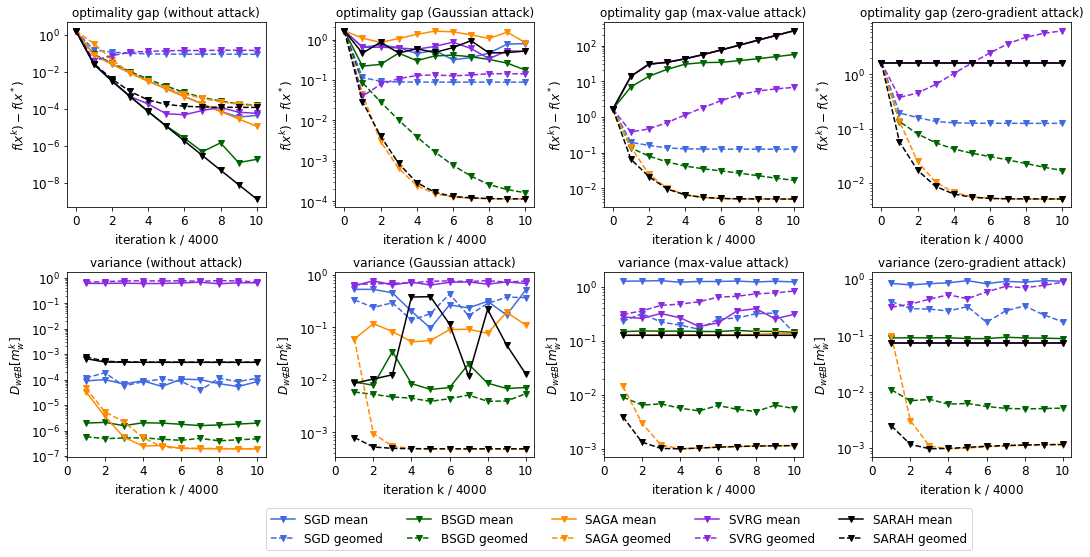

In [30]:
import matplotlib.pyplot as plt
import pickle
import math

def logAxis(path, Fmin):
    return [p-Fmin for p in path]

# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

dataSetConfig = dataSetConfigs[0]

SCALE = 2.0
FONT_SIZE = 12

fig, axs = plt.subplots(2, 4)
axs = tuple(zip(*axs))

attackNames = [
    ('baseline', 'without attack'), 
    ('white', 'Gaussian attack'), 
    ('maxValue', 'max-value attack'), 
    ('zeroGradient', 'zero-gradient attack'),
]
# 名称 颜色
optimizers = [
    ('SGD', 'SGD', 'royalblue'), 
    ('BatchSGD', 'BSGD', 'darkgreen'), 
    ('SAGA', 'SAGA', 'darkorange'),
    ('SVRG', 'SVRG', 'blueviolet'),
    ('SARAH', 'SARAH', 'k'),
]
# 文件名 图片中显示的名称 纹理
aggregations = [
    ('mean', 'mean',  'v-'), 
    ('gm', 'geomed','v--'),
]

CACHE_DIR = './cache/' + dataSetConfig['name']
with open(CACHE_DIR + '_Fmin', 'rb') as f:
    obj = pickle.load(f)
    Fmin, w_min = obj['Fmin'], obj['w_min']

x_axis = list(range(dataSetConfig['rounds']+1))
x_axis_minus_1 = list(range(1, dataSetConfig['rounds']+1))

for axline, (attackName, title) in zip(axs, attackNames):
    for optimizer, optimizerName, color in optimizers:
        for (aggregationName, showName, fmt) in aggregations:
            # 标签
            label = optimizerName + ' ' + showName
            
            # 画曲线
            with open(CACHE_DIR + '_' + optimizer+'_' + attackName + '_' + aggregationName, 'rb') as f:
                record = pickle.load(f)
                # 损失函数
                path = record['path']
                path = logAxis(path, Fmin)
                axline[0].plot(x_axis, path, fmt, color=color, label=label)
                # variance
                variancePath = record['variancePath']
                axline[1].plot(x_axis_minus_1, variancePath, fmt, color=color, label=label)
        
        # 填小标题
        axline[0].set_title('optimality gap ({})'.format(title))
        axline[1].set_title('variance ({})'.format(title))
    for ax in axline:
        # 坐标轴
        ax.set_yscale('log')
        ax.set_xlabel(r'iteration k / ${}$'.format(dataSetConfig['displayInterval']), fontsize=FONT_SIZE)
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontsize(FONT_SIZE) for label in labels]

    axline[0].set_ylabel(r'$f(x^k)-f(x^*)$', fontsize=FONT_SIZE)
    axline[1].set_ylabel(r'$D_{w\notin B} [m_w^k]$', fontsize=FONT_SIZE)
    axline[1].set_xlim(left=0)

# 图例
# 一行
# axs[-1][0].legend(loc='lower left', bbox_to_anchor=(0.01,-0.4), 
#                   borderaxespad = 0., ncol=4, fontsize=FONT_SIZE)
# 两行
axs[0][1].legend(loc='lower left', bbox_to_anchor=(1.0,-0.5), 
                  borderaxespad = 0., ncol=5, fontsize=FONT_SIZE)
# 右侧
# axs[-1][0].legend(loc='lower left', bbox_to_anchor=(1.2, 0.3), 
#                   borderaxespad = 0., ncol=1, fontsize=FONT_SIZE)

fig.set_size_inches((SCALE*9, SCALE*4))
plt.subplots_adjust(hspace=0.35, wspace=0.35)
# plt.savefig('./attack_loss_variance.eps', format='eps', bbox_inches='tight')
# plt.savefig('./attack_loss_variance.jpg', format='jpg', bbox_inches='tight')
plt.show()

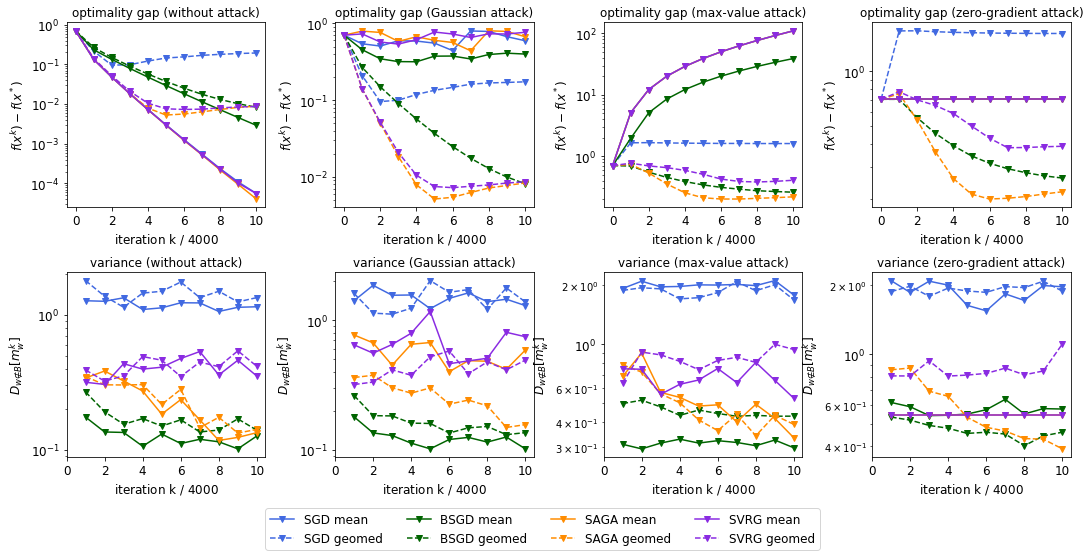

In [24]:
import matplotlib.pyplot as plt
import pickle
import math

def logAxis(path, Fmin):
    return [p-Fmin for p in path]

# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

dataSetConfig = dataSetConfigs[1]

SCALE = 2.0
FONT_SIZE = 12

fig, axs = plt.subplots(2, 4)
axs = tuple(zip(*axs))

attackNames = [
    ('baseline', 'without attack'), 
    ('white', 'Gaussian attack'), 
    ('maxValue', 'max-value attack'), 
    ('zeroGradient', 'zero-gradient attack'),
]
# 名称 颜色
optimizers = [
    ('SGD', 'SGD', 'royalblue'), 
    ('BatchSGD', 'BSGD', 'darkgreen'), 
    ('SAGA', 'SAGA', 'darkorange'),
    ('SVRG', 'SVRG', 'blueviolet'),
]
# 文件名 图片中显示的名称 纹理
aggregations = [
    ('mean', 'mean',  'v-'), 
    ('gm', 'geomed','v--'),
]

CACHE_DIR = './cache/' + dataSetConfig['name']
with open(CACHE_DIR + '_Fmin', 'rb') as f:
    obj = pickle.load(f)
    Fmin, w_min = obj['Fmin'], obj['w_min']

x_axis = list(range(dataSetConfig['rounds']+1))
x_axis_minus_1 = list(range(1, dataSetConfig['rounds']+1))

for axline, (attackName, title) in zip(axs, attackNames):
    for optimizer, optimizerName, color in optimizers:
        for (aggregationName, showName, fmt) in aggregations:
            # 标签
            label = optimizerName + ' ' + showName
            
            # 画曲线
            with open(CACHE_DIR + '_' + optimizer+'_' + attackName + '_' + aggregationName, 'rb') as f:
                record = pickle.load(f)
                # 损失函数
                path = record['path']
                path = logAxis(path, Fmin)
                axline[0].plot(x_axis, path, fmt, color=color, label=label)
                # variance
                variancePath = record['variancePath']
                axline[1].plot(x_axis_minus_1, variancePath, fmt, color=color, label=label)
        
        # 填小标题
        axline[0].set_title('optimality gap ({})'.format(title))
        axline[1].set_title('variance ({})'.format(title))
    for ax in axline:
        # 坐标轴
        ax.set_yscale('log')
        ax.set_xlabel(r'iteration k / ${}$'.format(dataSetConfig['displayInterval']), fontsize=FONT_SIZE)
        labels = ax.get_xticklabels() + ax.get_yticklabels()
        [label.set_fontsize(FONT_SIZE) for label in labels]

    axline[0].set_ylabel(r'$f(x^k)-f(x^*)$', fontsize=FONT_SIZE)
    axline[1].set_ylabel(r'$D_{w\notin B} [m_w^k]$', fontsize=FONT_SIZE)
    axline[1].set_xlim(left=0)

# 图例
# 一行
# axs[-1][0].legend(loc='lower left', bbox_to_anchor=(0.01,-0.4), 
#                   borderaxespad = 0., ncol=4, fontsize=FONT_SIZE)
# 两行
axs[0][1].legend(loc='lower left', bbox_to_anchor=(1.0,-0.5), 
                  borderaxespad = 0., ncol=4, fontsize=FONT_SIZE)
# 右侧
# axs[-1][0].legend(loc='lower left', bbox_to_anchor=(1.2, 0.3), 
#                   borderaxespad = 0., ncol=1, fontsize=FONT_SIZE)

fig.set_size_inches((SCALE*9, SCALE*4))
plt.subplots_adjust(hspace=0.35, wspace=0.35)
# plt.savefig('./attack_loss_variance.eps', format='eps', bbox_inches='tight')
# plt.savefig('./attack_loss_variance.jpg', format='jpg', bbox_inches='tight')
plt.show()

# 比较GM error, bias, variance

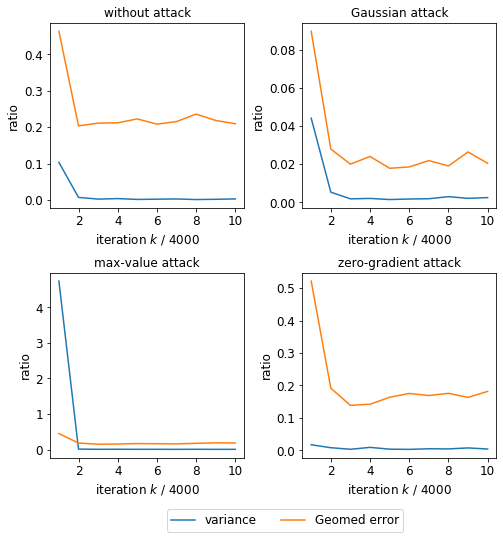

In [10]:

dataSetConfig = {
    'name': 'ijcnn1',

    'dataSet' : 'ijcnn1',
    'dataSetSize': 49990,
    'maxFeature': 22,
    'findingType': '1',

    'honestNodeSize': 50,
    'byzantineNodeSize': 20,

    'rounds': 10,
    'displayInterval': 4000,
}

SCALE = 2.0
FONT_SIZE = 12

x_axis_minus_1 = list(range(1, dataSetConfig['rounds']+1))

CACHE_DIR = './cache/' + dataSetConfig['name']

attackNames = [
    ('baseline', 'without attack'), 
    ('white', 'Gaussian attack'), 
    ('maxValue', 'max-value attack'), 
    ('zeroGradient', 'zero-gradient attack'),
]

fig, axs = plt.subplots(2, 2)
axs = sum(axs.tolist(), [])
for ax, (attackName, title) in zip(axs, attackNames):
    with open(CACHE_DIR + '_SGD_SAGA_cmpVar_' + attackName, 'rb') as f:
        record = pickle.load(f)

#     SAGA_biasPath = record['SAGA_biasPath']
    SAGA_variencePath = record['SAGA_variencePath']
    SAGA_error_Path = record['SAGA_error_Path']
#     SGD_biasPath = record['SGD_biasPath']
    SGD_variencePath = record['SGD_variencePath']
    SGD_error_Path = record['SGD_error_Path']

    # SAGA / SGD
#     biasPro = [b_saga / b_sgd for b_saga, b_sgd in zip(SAGA_biasPath, SGD_biasPath)]
    varPro = [v_saga / v_sgd for v_saga, v_sgd in zip(SAGA_variencePath, SGD_variencePath)]
    errPro = [e_saga / e_sgd for e_saga, e_sgd in zip(SAGA_error_Path, SGD_error_Path)]

#     ax.plot(x_axis_minus_1, biasPro, label='error')
    ax.plot(x_axis_minus_1, varPro, label='variance')
    ax.plot(x_axis_minus_1, errPro, label='Geomed error')

    # plt.plot(x_axis_minus_1, SAGA_biasPath, label='SAGA_biasPath')
    # plt.plot(x_axis_minus_1, SAGA_variencePath, label='SAGA_variencePath')
    # plt.plot(x_axis_minus_1, SAGA_error_Path, label='SAGA_error_Path')
    # plt.plot(x_axis_minus_1, SGD_biasPath, label='SGD_biasPath')
    # plt.plot(x_axis_minus_1, SGD_variencePath, label='SGD_variencePath')
    # plt.plot(x_axis_minus_1, SGD_error_Path, label='SGD_error_Path')

    # 填小标题
    ax.set_title('{}'.format(title))

    # 坐标轴
    ax.set_xlabel(r'iteration $k$ / ${}$'.format(dataSetConfig['displayInterval']), fontsize=FONT_SIZE)
    ax.set_ylabel(r'ratio', fontsize=FONT_SIZE)
    labels = ax.get_xticklabels() + ax.get_yticklabels()
    [label.set_fontsize(FONT_SIZE) for label in labels]
    
#     ax.set_yscale('log')

# 两行
axs[-2].legend(loc='lower left', bbox_to_anchor=(0.6,-0.4), 
                  borderaxespad = 0., ncol=3, fontsize=FONT_SIZE)

fig.set_size_inches((SCALE*4, SCALE*4))
plt.subplots_adjust(hspace=0.35, wspace=0.3)
# plt.savefig('./cmp_variance.eps', format='eps', bbox_inches='tight')
plt.show()

# 单个精度影响聚合精度示意图

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


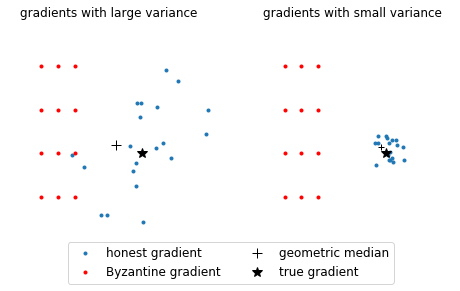

In [11]:
import numpy as np

def aggregate_geometric(wList):
    max_iter = 1000
    tol = 1e-7
    guess = np.mean(wList, axis=0)
    for _ in range(max_iter):
        dist_li = [np.linalg.norm(w - guess) for w in wList]
        dist_li = [d if d != 0 else 1 for d in dist_li]
        temp1 = np.sum([w / dist for w, dist in zip(wList, dist_li)], axis=0)
        temp2 = np.sum([1.0 / dist for dist in dist_li])
        guess_next = temp1 / temp2
        guess_movement = np.linalg.norm(guess - guess_next)
        guess = guess_next
        if guess_movement <= tol:
            break
    return guess

fig, axs = plt.subplots(1, 2)

bias = 1
pointCount = 20

mean = [4, 2]
largeVar = 1.0
smallVar = 0.1

MARKER_SIZE = 10

np.random.seed(500)
largeList = np.random.multivariate_normal(mean, largeVar*np.array([[1, 0], [0, 1]]), pointCount)
smallList = np.random.multivariate_normal(mean, smallVar*np.array([[1, 0], [0, 1]]), pointCount)

byzantineNode = np.array([
    [1, 4],
    [1, 3],
    [1, 2],
    [1, 1],
    [1.5, 4],
    [1.5, 3],
    [1.5, 2],
    [1.5, 1],
    [2, 4],
    [2, 3],
    [2, 2],
    [2, 1]
])
[*byzantineXY] = zip(*byzantineNode)

largeAll = np.vstack([largeList, byzantineNode])
smallAll = np.vstack([smallList, byzantineNode])

largeGM = aggregate_geometric(largeAll)
smallGM = aggregate_geometric(smallAll)

[*largeXY] = zip(*largeList)
[*smallXY] = zip(*smallList)

# 画好节点
fmt = '.'
axs[0].plot(largeXY[0], largeXY[1], fmt, label='honest gradient')
axs[1].plot(smallXY[0], smallXY[1], fmt)

# 画拜占庭节点
bfmt = 'r.'
for ax in axs:
    ax.plot(byzantineXY[0], byzantineXY[1], bfmt, label='Byzantine gradient')
    
# GM
GMfmt = 'k+'
axs[0].plot([largeGM[0]], [largeGM[1]], GMfmt, label='geometric median', markersize=MARKER_SIZE)
axs[1].plot([smallGM[0]], [smallGM[1]], GMfmt)

# 真实梯度
trueFmt = 'k*'
for ax in axs:
    ax.plot([mean[0]], [mean[1]], trueFmt, label='true gradient', markersize=MARKER_SIZE)

for ax in axs:
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 5)
    ax.set_axis_off()

axs[0].set_title('gradients with large variance')
axs[1].set_title('gradients with small variance')
SCALE = 1
FONT_SIZE = 12
fig.set_size_inches((SCALE*8, SCALE*4))
axs[0].legend(loc='lower left', bbox_to_anchor=(0.3,-0.2), 
                  borderaxespad = 0., ncol=2, fontsize=FONT_SIZE)
plt.savefig('./sketchMap_howVarianceAffectGM.eps', format='eps', bbox_inches='tight')
plt.show()